In [37]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_openml            # common data set access
from sklearn.preprocessing import StandardScaler     # scaling transform
from sklearn.model_selection import train_test_split # validation tools
from sklearn.metrics import accuracy_score, zero_one_loss
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
seed = 1234
np.random.seed(seed)
import warnings
warnings.filterwarnings('ignore')

In [38]:
DB = fetch_ucirepo(id=296) 

In [39]:
X = DB.data.features 
y = DB.data.targets
from sklearn.preprocessing import LabelEncoder

X.fillna('Unknown', inplace=True)

label_encoder = LabelEncoder()

for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])
        print(X[column], ": ", type(label_encoder)) 

print(X.info())
features_to_remove = ['weight', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'glyburide-metformin', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
'citoglipton', 'max_glu_serum', 'nateglinide', 'chlorpropamide', 'repaglinide', 'glimepiride', 'acetohexamide']

X = X.drop(columns=features_to_remove)

0         2
1         2
2         0
3         2
4         2
         ..
101761    0
101762    0
101763    2
101764    2
101765    2
Name: race, Length: 101766, dtype: int64 :  <class 'sklearn.preprocessing._label.LabelEncoder'>
0         0
1         0
2         0
3         1
4         1
         ..
101761    1
101762    0
101763    1
101764    0
101765    1
Name: gender, Length: 101766, dtype: int64 :  <class 'sklearn.preprocessing._label.LabelEncoder'>
0         0
1         1
2         2
3         3
4         4
         ..
101761    7
101762    8
101763    7
101764    8
101765    7
Name: age, Length: 101766, dtype: int64 :  <class 'sklearn.preprocessing._label.LabelEncoder'>
0         1
1         1
2         1
3         1
4         1
         ..
101761    1
101762    1
101763    1
101764    1
101765    1
Name: weight, Length: 101766, dtype: int64 :  <class 'sklearn.preprocessing._label.LabelEncoder'>
0         16
1         16
2         16
3         16
4         16
          ..
101761 

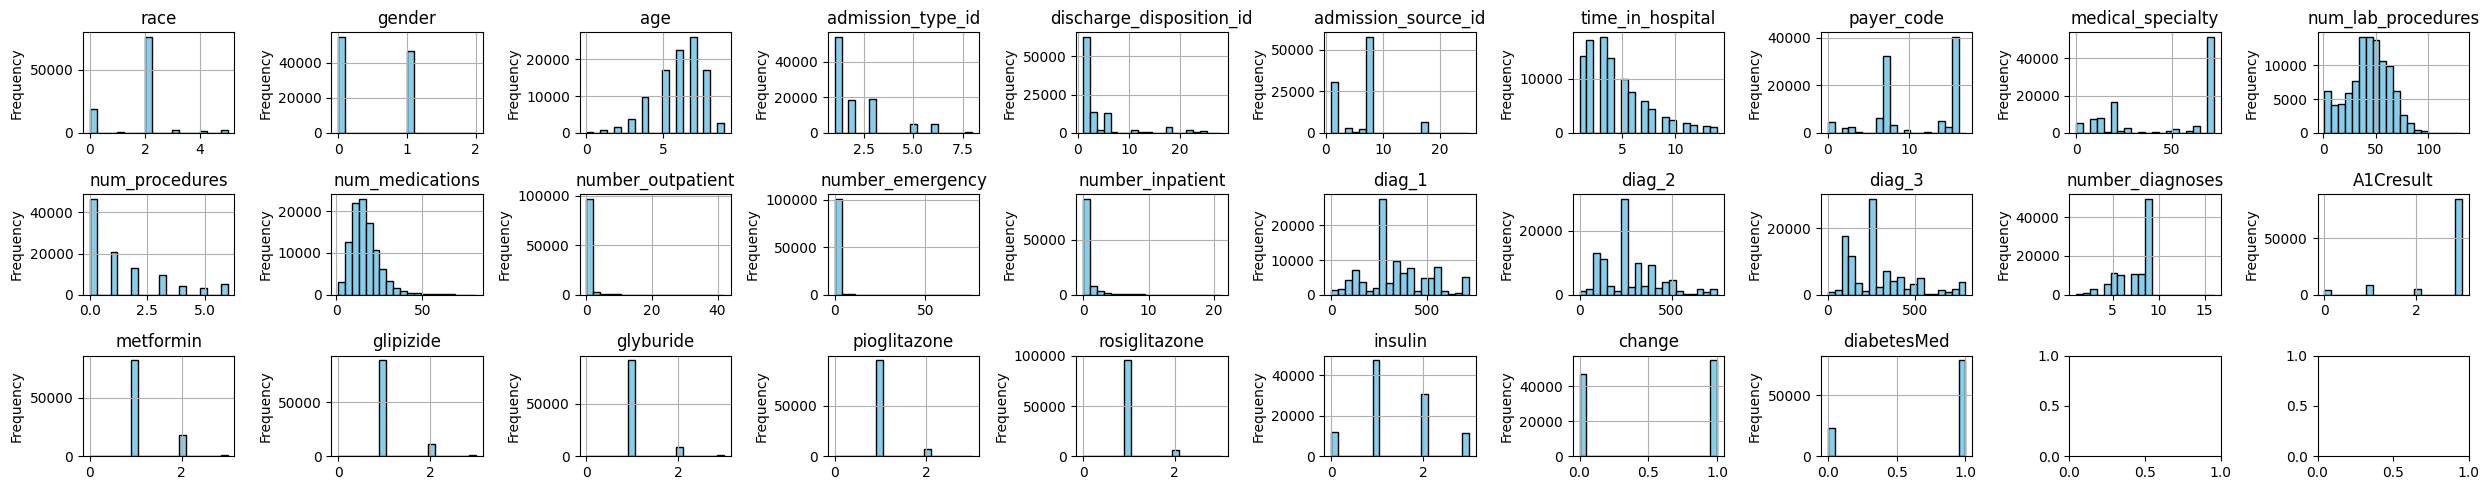

In [43]:
num_rows, num_cols = 3, 10
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 5))

for i, column in enumerate(X.columns):
    ax = axes[i // num_cols, i % num_cols]
    X[column].plot(kind='hist', ax=ax, bins=20, edgecolor='black', color='skyblue')
    ax.set_title(column)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [50]:
m_tr = 10000

X_tr = m_tr[0:2000]
y_tr = np.random.randint(0, 2000, size=(m_tr,))
#print(X_tr.shape, Y_tr.shape)
X_tr_subset = X_tr[:m_tr, :]
y_tr_subset = y_tr[:m_tr]
#get first 2k data
Xtraining = X_tr_subset[2000: 10000, :]
Ytraining = y_tr_subset[2000: 10000]
Xtest = X_tr_subset[0:2000, :]
Ytest = y_tr_subset[0:2000]
#Construct a logistic regression classifier (random_state = seed)
#Fit the model to the training data subset


TypeError: 'int' object is not subscriptable